# <center>Método de Lax Wendroff</center>

O esquema de diferenças finitas de (Lax e Wendroff, 1960) é um método numérico usado para aproximar soluções de equações diferenciais parciais, particularmente a equação de onda. É um esquema de segunda ordem de precisão que pode ser derivado usando uma expansão em série de Taylor.

O esquema começa com a expansão em série de Taylor da solução no próximo passo de tempo, denotado por $u_{j}^{n+1}$, onde $j$ representa o índice espacial e $n$ representa o índice temporal. A expansão é dada pela Equação 4.41:

\begin{equation}
u_j^{n+1} = u_j^n + \Delta t u_t + \frac{1}{2} \left( \Delta t\right)^2 u_{tt} + O\left[(\Delta t)^3\right]
\tag{4.41}
\end{equation}

Usando as equações da onda

\begin{equation}
u_t = -c u_x \\
\tag{4.42} \\
u_{tt} = c^2 u_{xx}
\end{equation}

Ao substituir as derivadas parciais da equação de onda (Equação 4.42) na Equação 4.41, obtemos:

\begin{equation}
u_j^{n+1} = u_{n,j} - c \Delta t u_x + c^2\frac{{(\Delta t)^2}}{2} u_{xx} + O\left[(\Delta t)^3\right]
\tag{4.43}
\end{equation}

Finalmente, se substituirmos as derivadas espaciais $u_x$ e $u_{xx}$ por expressões de diferenças centrais de segunda ordem, chegamos ao esquema de Lax-Wendroff (Equação 4.44):

\begin{equation}
u_{n,j+1} = u_{n,j} - \frac{{c\Delta t}}{{2\Delta x}} (u_{n,j+1} - u_{n,j-1}) + \frac{{c^2 (\Delta t)^2}}{{2(\Delta x)^2}} (u_{n,j+1} - 2u_{n,j} + u_{n,j-1})
\tag{4.44}
\end{equation}

Esse esquema é explícito, o que significa que calcula o valor no próximo passo de tempo diretamente a partir dos valores conhecidos nos passos de tempo atual e anterior. É de segunda ordem de precisão tanto no tempo quanto no espaço. O erro de truncamento (T.E.) do esquema é da ordem $O\left[(\Delta x)^2, (\Delta t)^2\right]$.

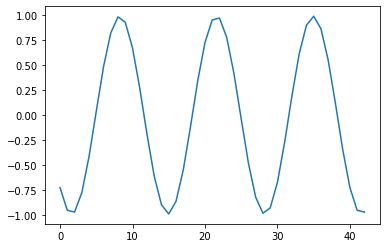

In [1]:
import numpy as np
import matplotlib.pyplot as plt

l = 40
delta_x = 1
num_pontos = 41
t_final = 18
c = 1
delta_t = 0.1 
n = 3
x = np.arange(0, num_pontos, delta_x)
t = np.arange(0, t_final, delta_t)
num_tempo = len(t)

num_pontos2 = num_pontos + 2

u_num = np.zeros((num_tempo, num_pontos2))
u_num[0, 1:num_pontos2 - 1] = np.sin((2 * n * np.pi * x) / l)
u_num[0, 0] = u_num[0, num_pontos2 - 3]
u_num[0, num_pontos2 - 1] = u_num[0, 2]

v = (delta_t / delta_x) * c

for i in range(0, num_tempo - 1):
    n = i
    for j in range(1, (num_pontos2 - 1)):
        u_num[n+1, j] = u_num[n, j] - (v / 2) * (u_num[n, j + 1] - u_num[n, j - 1]) + ((v ** 2) / 2) * (
                u_num[n, j + 1] - 2 * u_num[n, j] + u_num[n, j - 1])
        u_num[n+1, 0] = u_num[n+1, num_pontos2 - 3]
        u_num[n+1, num_pontos2 - 1] = u_num[n+1, 2]

plt.plot(u_num[-1,:]);